In [1]:
import sklearn.datasets
import utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
trainset = sklearn.datasets.load_files(container_path = 'local', decode_error = 'replace')
trainset.data, trainset.target = utils.separate_dataset(trainset)
print len(trainset.data)
print trainset.filenames
print len(trainset.target)

25292
['local/pembangkang/pembangkang' 'local/hungry/hungry' 'local/apple/89'
 'local/kerajaan/kerajaan' 'local/adidas/adidas' 'local/nike/nike']
25292


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


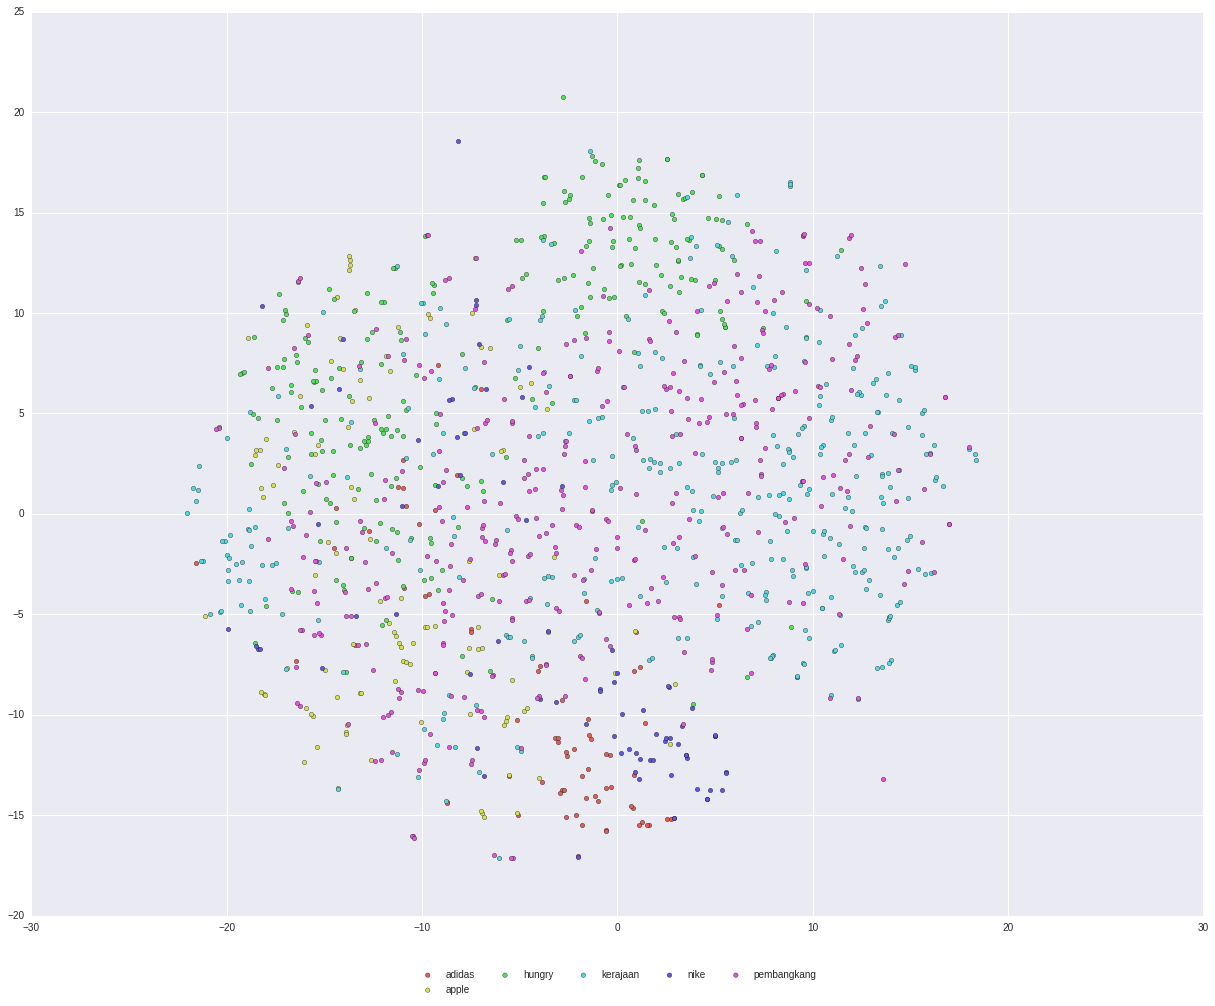

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

current_palette = sns.color_palette("hls", len(trainset.filenames))

# visualize 20% of our data
_, x, _, y = train_test_split(trainset.data, trainset.target, test_size = 0.05)

y = np.array(y)

plt.rcParams["figure.figsize"] = [21, 18]
ax = plt.subplot(111)

X = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),]).fit_transform(x).todense()
X = StandardScaler().fit_transform(X)
X = Normalizer().fit_transform(X)
tsne = TSNE(n_components = 2).fit_transform(X)
for no, _ in enumerate(np.unique(trainset.target_names)):
    ax.scatter(tsne[y == no, 0], tsne[y == no, 1], c = current_palette[no], label = trainset.target_names[no])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.show()

In [4]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [5]:
testset = sklearn.datasets.load_files(container_path = 'local', random_state = 40)
testset.data, testset.target = utils.separate_dataset(testset)

In [6]:
text_clf.fit(trainset.data, trainset.target)
predicted = text_clf.predict(testset.data)
print (np.mean(predicted == testset.target))

0.881780800253


In [7]:
print(metrics.classification_report(testset.target, predicted, target_names = testset.target_names))

             precision    recall  f1-score   support

     adidas       0.98      0.70      0.82      1550
      apple       0.98      0.78      0.87      2296
     hungry       0.87      0.97      0.92      5245
   kerajaan       0.92      0.88      0.90      6957
       nike       0.97      0.69      0.80      1608
pembangkang       0.82      0.93      0.87      7636

avg / total       0.89      0.88      0.88     25292



In [8]:
inputs = ['hari ini saya rasa lapar sangat']
predicted = text_clf.predict(inputs)
print('%r => %s' % (inputs, trainset.target_names[predicted[0]]))
print text_clf.predict_proba(inputs)

['hari ini saya rasa lapar sangat'] => hungry
[[  1.56195581e-04   1.95109264e-04   7.58908045e-01   1.17746655e-01
    1.58868621e-04   1.22835127e-01]]


In [9]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss = 'modified_huber', penalty = 'l2', alpha = 1e-3, n_iter = 10, random_state = 42))])
text_clf.fit(trainset.data, trainset.target)

predicted = text_clf.predict(testset.data)
print (np.mean(predicted == testset.target))

0.89494701882


In [10]:
print(metrics.classification_report(testset.target, predicted, target_names=testset.target_names))

             precision    recall  f1-score   support

     adidas       0.97      0.86      0.91      1550
      apple       0.99      0.80      0.89      2296
     hungry       0.99      0.91      0.95      5245
   kerajaan       0.90      0.89      0.90      6957
       nike       0.98      0.82      0.89      1608
pembangkang       0.79      0.94      0.86      7636

avg / total       0.91      0.89      0.90     25292



In [11]:
inputs = ['hari ini saya rasa lapar sangat']
predicted = text_clf.predict(inputs)
print('%r => %s' % (inputs, trainset.target_names[predicted[0]]))
print text_clf.predict_proba(inputs)

['hari ini saya rasa lapar sangat'] => hungry
[[ 0.          0.          0.85695575  0.          0.          0.14304425]]
